In [ ]:
import pandas as pd
df_review = pd.read_csv('grab.csv')
df_review.tail()

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
31838,31838,gp:AOqpTOHVXkkF54En48ASRtdSKrtNsBzrkuXim53yuuE...,Rizka Agnita,https://play-lh.googleusercontent.com/-g5NKh-D...,Bermanfaat,5.0,0.0,NaN,2020-05-29 09:02:25,NaN,NaN
31839,31839,gp:AOqpTOGJMDWzmYoe93ZZH3tc0Z-VhbSgPEFvQ6ZT5N6...,Salma Putri Nabila,https://play-lh.googleusercontent.com/a-/AOh14...,Kenapa ya gabisa buat akun?,2.0,0.0,4.51.1,2020-05-29 08:58:14,NaN,NaN
31840,31840,gp:AOqpTOGrZfXmYhhLTTZvDpTdKvJJZmZC5oTRIjyU8kf...,Umi Yati,https://play-lh.googleusercontent.com/-QX5S4sU...,Mantap,5.0,0.0,5.80.0,2020-05-29 08:56:17,NaN,NaN
31841,31841,gp:AOqpTOGykKiSAI6eYj8aQP2nmHjvdRH5NaZj06ZfTI8...,Lia Rosida,https://play-lh.googleusercontent.com/a-/AOh14...,🙏,3.0,0.0,5.74.1,2020-05-29 08:44:44,NaN,NaN
31842,31842,gp:AOqpTOG9rUPDsEJfXvdJo0ohcaRdWJNLiRte_zQ4oUq...,yusuf 82,https:,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_review = df_review[['Unnamed: 0', 'userName','at','content','score']]
df_review.head()

,Unnamed: 0,userName,at,content,score
0,0,Madina,2020-08-11 06:10:14,Sangat bermanfaat,5.0
1,1,Diyan Sarii,2020-08-11 06:09:45,Baik,5.0
2,2,Hertina Sirait,2020-08-11 06:09:19,lumayan,3.0
3,3,Devi Novita sari sipahutar,2020-08-11 06:08:07,Mkin hri mkin lma proses grap ne.. Kta klu pes...,1.0
4,4,ahmad suseno,2020-08-11 06:07:38,Paling g suka jika dapat driver dobel orderr l...,2.0


In [ ]:
df_review['score'].value_counts()

5.0    20265
1.0     6367
4.0     2416
3.0     1569
2.0     1225
Name: score, dtype: int64

In [ ]:
label = []
for index, row in df_review.iterrows():
    if row['score'] == 5:
        label.append(1)
    else:
        label.append(0)
df_review['label'] = label
df_review = df_review.drop(columns=['score'])
df_review.tail()

,Unnamed: 0,userName,at,content,label
31838,31838,Rizka Agnita,2020-05-29 09:02:25,Bermanfaat,1
31839,31839,Salma Putri Nabila,2020-05-29 08:58:14,Kenapa ya gabisa buat akun?,0
31840,31840,Umi Yati,2020-05-29 08:56:17,Mantap,1
31841,31841,Lia Rosida,2020-05-29 08:44:44,🙏,0
31842,31842,yusuf 82,NaN,NaN,0


In [ ]:
df_review['label'].value_counts()

1    20265
0    11578
Name: label, dtype: int64

In [ ]:
df_preprecessed = df_review.copy()
df_preprecessed = df_preprecessed.drop(columns=['Unnamed: 0','userName','at'])
df_preprecessed.head()

,content,label
0,Sangat bermanfaat,1
1,Baik,1
2,lumayan,0
3,Mkin hri mkin lma proses grap ne.. Kta klu pes...,0
4,Paling g suka jika dapat driver dobel orderr l...,0


In [ ]:
s_1 = df_preprecessed[df_preprecessed['label']==0].sample(10000, replace=True)
s_2 = df_preprecessed[df_preprecessed['label']==1].sample(10000, replace=True)
df_preprecessed = pd.concat([s_1,s_2])

print(df_preprecessed.shape)
print(df_preprecessed['label'].value_counts(normalize=True))

(20000, 2)
1    0.5
0    0.5
Name: label, dtype: float64


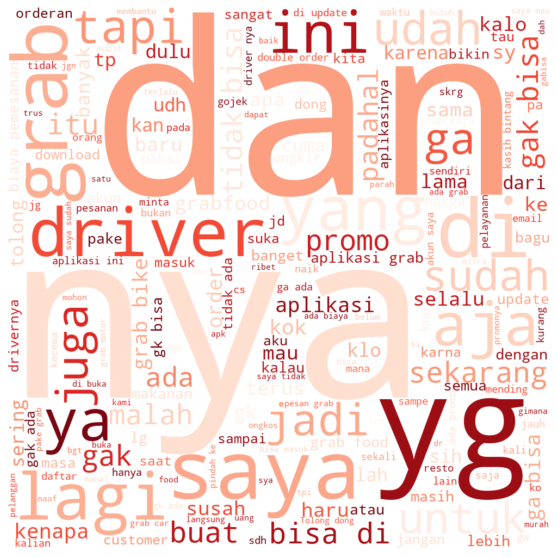

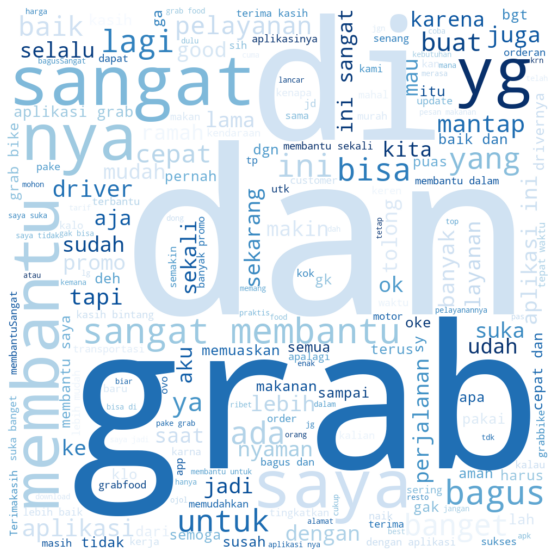

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#polarity == 0 negative
train_s0 = df_preprecessed[df_preprecessed['label']==0]
all_text_s0 = ''.join(word for word in train_s0['content'])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show()


#polarity == 1 positive
train_s1 = df_preprecessed[df_preprecessed['label']==1]
all_text_s1 = ''.join(word for word in train_s1['content'])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s1)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show()

In [ ]:
import string, re
def cleansing(data):
    data = data.lower()
    remove = string.punctuation
    
    data = data.replace('\n', '')
    
    return data

In [ ]:
review = []
for index, row in df_preprecessed.iterrows():
    review.append(cleansing(row['content']))

df_preprecessed['content']=review
df_preprecessed.head()

,content,label
8698,baguss👍 dapat membuat orang menjadi lebih muda...,0
4433,update terus,0
25331,"semakin mengecewakan, driver makin lama karena...",0
22757,okeee,0
9288,bagus,0


In [ ]:
pip install Sastrawi

     |████████████████████████████████| 215kB 11.5MB/s 


In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()


In [ ]:
review = []
for index, row in df_preprecessed.iterrows():
    review.append(stopword.remove(row['content']))
    
df_preprecessed['content']=review
df_preprecessed.head()

,content,label
8698,baguss👍 membuat orang menjadi lebih mudah cepa...,0
4433,update terus,0
25331,"semakin mengecewakan, driver makin lama bisa p...",0
22757,okeee,0
9288,bagus,0


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
review = []
for index, row in df_preprecessed.iterrows():
    review.append(stemmer.stem(row['content']))
    
df_preprecessed['content']=review
df_preprecessed.head()

,content,label
8698,baguss buat orang jadi lebih mudah cepat singk...,0
4433,update terus,0
25331,makin kecewa driver makin lama bisa pickup 2 o...,0
22757,okeee,0
9288,bagus,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_preprecessed['content'], df_preprecessed['label'],
                                                   test_size=0.1, stratify = df_preprecessed['label'], random_state=30)

In [ ]:
print("X_train_shape : ",X_train.shape)
print("X_test_shape : ",X_test.shape)
print("y_train_shape : ",y_train.shape)
print("y_test_shape : ",y_test.shape)

X_train_shape :  (18000,)
X_test_shape :  (2000,)
y_train_shape :  (18000,)
y_test_shape :  (2000,)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [ ]:
def preprocess_data(data):
    data = cleansing(data)
    factory = StopWordRemoverFactory()
    stopword = factory.create_stop_word_remover()
    data = stopword.remove(data)
    
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    data = stemmer.stem(data)
    
    data = vectorizer.transform([data])
    return data

In [ ]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

clf = svm.SVC(kernel='linear')

In [ ]:
clf.fit(X_train,y_train)
predict = clf.predict(X_test)

In [ ]:
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix, accuracy_score

In [ ]:
#accuray score
print('accuracy score hasil prediksi adalah : ')
print(accuracy_score(y_test, predict))

#precision score
print('precision score hasil prediksi adalah : ')
print(precision_score(y_test, predict))

#recall score
print('recall score hasil prediksi adalah : ')
print(recall_score(y_test, predict))

accuracy score hasil prediksi adalah : 
0.8585
precision score hasil prediksi adalah : 
0.8098530682800346
recall score hasil prediksi adalah : 
0.937


In [ ]:
#confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, predict).ravel()
tn,fp,fn,tp

(780, 220, 63, 937)

In [ ]:
review_positif = 'apa sih'
review_negatif = 'jelek sekali'

In [ ]:
clf.predict(preprocess_data(review_positif))

array([0])

In [ ]:
clf.predict(preprocess_data(review_negatif))

array([0])